In [1]:
%matplotlib inline   
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
LARGE_FIG_SIZE=(15, 15)

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11da1ca60>,
      dtype=object)

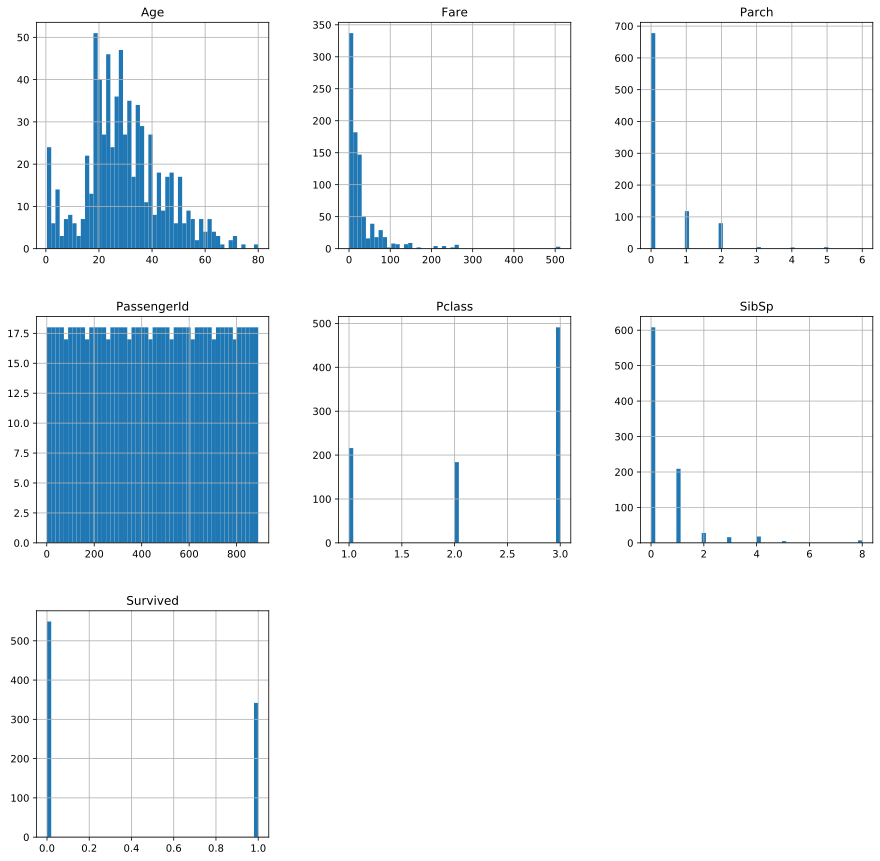

In [7]:
titanic.hist(bins=50, figsize=LARGE_FIG_SIZE)

In [58]:
# What will be the accuracy if a model predicts that only females survived?

y_only_fem_pred = (titanic['Sex']=='female').values
y=titanic['Survived'].values

np.sum(y_only_fem_pred == y)/y.shape[0]

0.7867564534231201

In [268]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Survived    - Target variable

Numerical Columns

- Pclass      - useful (onehotencoder?)
- Age         - useful (has nulls, replace with medians?)
- SibSp       - useful?
- Parch       - useful?
- Fare        - useful


other columns

- Sex      - useful (ordinal encoder)
- Embarked - useful? (onehotencoder) (has 2 nulls - drop these rows)



not useful columns

- PassengerId - not useful
- Ticket   - not useful
- Cabin    - not useful
- Name     - not useful

New Features
- FamSize = SibSp + Parch
- Title

I want a simple way to compare
    - adding and removing features
    - different models
    - different hyperparameters (before and after tuning)
    
    
one function to prepare data
one function to list metrics(accuracy, precision. recall, f1_score), visualizations (conf_mx, learning curves) in an accessible way, given data and model

In [ ]:
from sklearn.impute import KNNImputer


In [626]:
# drop rows where Embarked is NaN

titanic_nn = titanic.dropna(subset=['Embarked'])

In [270]:
from sklearn.preprocessing import OneHotEncoder

embarked_encoder = OneHotEncoder()
pclass_encoder = OneHotEncoder()

embarked_cat = embarked_encoder.fit_transform(titanic_nn[['Embarked']])
pclass_cat = pclass_encoder.fit_transform(titanic_nn[['Pclass']])

embarked_encoder.categories_, pclass_encoder.categories_

([array(['C', 'Q', 'S'], dtype=object)], [array([1, 2, 3])])

In [271]:
titanic_ft = titanic_nn.drop('Survived', 1)
titanic_labels = titanic_nn[['Survived']]
y = titanic_labels.values

In [411]:
from sklearn.base import BaseEstimator, TransformerMixin

# cols = list(titanic_ft.columns)
# sibSp_idx = cols.index('SibSp')
# parch_idx = cols.index('Parch')

class FamSizeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, sibSp_idx, parch_idx):
        self.sibSp_idx = sibSp_idx
        self.parch_idx = parch_idx
    def fit(self, *args, **kwargs):
        return self
    def transform(self, X):
        fam_size =  X[:,self.sibSp_idx] + X[:, self.parch_idx]
        return np.c_[np.delete(X, [self.sibSp_idx, self.parch_idx], 1), fam_size]
    
# fam_size_adder = FamSizeAdder()
# pd.DataFrame(fam_size_adder.fit_transform(titanic_ft.values))

In [595]:
test_array = np.array([1,3,4])

In [601]:
np.array([str(xi) for xi in test_array])

array(['1', '3', '4'], dtype='<U1')

In [623]:
titles_collection = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Major', 'Lady', 'Sir', 'Capt']

def get_title(title, sex, age):
    if title is None or title not in titles_collection:
        if sex == 'male':
            if age <= 15:
                return 'Master'
            else:
                return 'Mr'
        else:
            return 'Miss'
    else:
        return title 
    
def set_title(r):
    r['Title'] = get_title(r['Title'], r['Sex'], r['Age'])
    return r

def add_title_transformer(df):
    df_copy = df.copy()
    
    df_copy.loc[:,'Title'] = df['Name'].apply(lambda n: n.split(',')[1].strip().split(' ')[0][:-1])
    df_copy = df_copy.apply(set_title, axis=1)
    return df_copy
    

In [631]:
# add_title_transformer(titanic_nn)

title_enc = OneHotEncoder()

title_enc.fit_transform(add_title_transformer(titanic_nn)[['Title']])

<889x11 sparse matrix of type '<class 'numpy.float64'>'
	with 889 stored elements in Compressed Sparse Row format>

In [632]:
title_enc.categories_

[array(['Capt', 'Col', 'Dr', 'Lady', 'Major', 'Master', 'Miss', 'Mr',
        'Mrs', 'Rev', 'Sir'], dtype=object)]

In [666]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('replace_fam_size', FamSizeAdder(1,2)),
    ('std_scaler', StandardScaler())
])

In [667]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

num_attr = ['Age', 'SibSp', 'Parch', 'Fare'] #4 - 2 +1 =3
cat_ordinal_attr = ['Sex'] #1
cat_onehot_attr = ['Pclass', 'Embarked', 'Title'] # 3+3+ 11 = 17, total 21 columns



pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attr),
    ('cat_ordinal', OrdinalEncoder(), cat_ordinal_attr),
    ('cat_onehot', OneHotEncoder(), cat_onehot_attr)
])

In [668]:
cleaned_columns = ['Age', 'Fare', 'FamSize'] \
    + cat_ordinal_attr + ['Class-'+str(c) for c in pclass_encoder.categories_[0]] \
    + ['Embarked-'+str(c) for c in embarked_encoder.categories_[0]] \
    + ['Title-'+str(c) for c in title_enc.categories_[0]]
cleaned_columns, len(cleaned_columns)

(['Age',
  'Fare',
  'FamSize',
  'Sex',
  'Class-1',
  'Class-2',
  'Class-3',
  'Embarked-C',
  'Embarked-Q',
  'Embarked-S',
  'Title-Capt',
  'Title-Col',
  'Title-Dr',
  'Title-Lady',
  'Title-Major',
  'Title-Master',
  'Title-Miss',
  'Title-Mr',
  'Title-Mrs',
  'Title-Rev',
  'Title-Sir'],
 21)

In [669]:
X = pipeline.fit_transform(add_title_transformer(titanic_ft))
X.shape

(889, 21)

In [670]:
titanic_prepared = pd.DataFrame(X, columns=cleaned_columns)
titanic_prepared['Survived'] = y
titanic_prepared

,Age,Fare,FamSize,Sex,Class-1,Class-2,Class-3,Embarked-C,Embarked-Q,Embarked-S,...,Title-Dr,Title-Lady,Title-Major,Title-Master,Title-Miss,Title-Mr,Title-Mrs,Title-Rev,Title-Sir,Survived
0,-0.563674,-0.500240,0.057853,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.669217,0.788947,0.057853,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,-0.255451,-0.486650,-0.561804,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0.438050,0.422861,0.057853,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.438050,-0.484133,-0.561804,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,-0.178396,-0.384475,-0.561804,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
885,-0.794841,-0.042213,-0.561804,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
886,-0.101340,-0.174084,1.297169,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
887,-0.255451,-0.042213,-0.561804,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


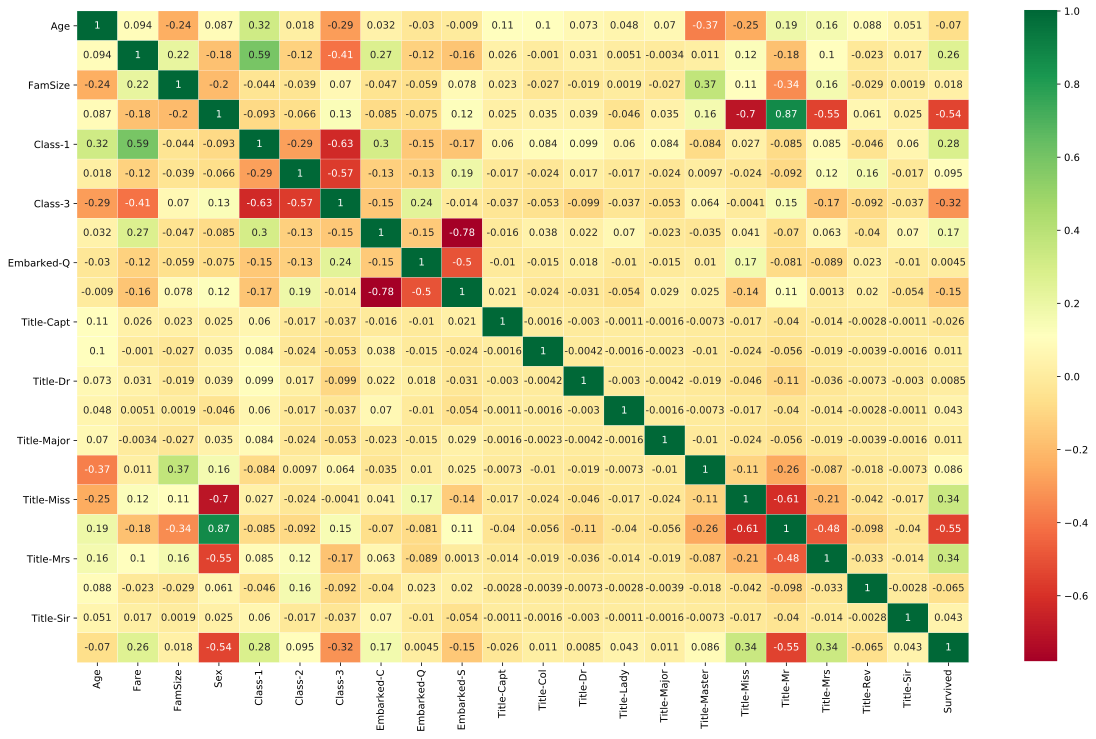

In [671]:
sns.heatmap(titanic_prepared.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)

In [672]:
from sklearn.tree import DecisionTreeClassifier

tree_class = DecisionTreeClassifier()
tree_class.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [673]:
sample_ft = titanic_ft.head(10)
sample_labels = titanic_labels.head(10)
sample_prep = pipeline.transform(sample_ft)

print('predictions', tree_class.predict(sample_prep))
print('labels     ', sample_labels['Survived'].values)

ValueError: Number of features of the input must be equal to or greater than that of the fitted transformer. Transformer n_features is 12 and input n_features is 11.

In [674]:
print('score(accuracy) on training set', tree_class.score(X,y))

score(accuracy) on training set 0.9820022497187851


In [675]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, f1_score

def show_cross_validation_score(y, y_pred):
    conf_mx = confusion_matrix(y, y_pred)
    print('scores\n')
    print('precision', precision_score(y, y_pred))
    print('recall   ', recall_score(y, y_pred))
    print('f1       ', f1_score(y, y_pred))
    print('accuracy ', np.sum(y == y_pred)/y.shape[0])


    sns.heatmap(conf_mx, annot=True, fmt='3.0f')

scores

precision 0.9939024390243902
recall    0.9588235294117647
f1        0.9760479041916168
accuracy  0.9820022497187851


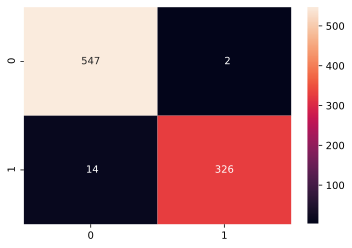

In [676]:
y_pred = tree_class.predict(X)
show_cross_validation_score(y.ravel(), y_pred)

In [677]:
from sklearn.model_selection import cross_val_score

tree_class_scores = cross_val_score(tree_class, X, y, cv=5, scoring='accuracy')
tree_class_scores, tree_class_scores.mean()

# DecisionTreeClassifier classifier gives 78% accuracy

(array([0.76966292, 0.76404494, 0.79213483, 0.76966292, 0.77966102]),
 0.7750333269853361)

In [678]:
from sklearn.model_selection import cross_val_predict

tree_clf_predict_proba = cross_val_predict(tree_class, X, y.ravel(), cv=5, method='predict_proba')
tree_clf_cv_pred = cross_val_predict(tree_class, X, y.ravel(), cv=5)
# pd.DataFrame(tree_clf_predict_proba).hist(bins=25, figsize=LARGE_FIG_SIZE)

scores

precision 0.7083333333333334
recall    0.7
f1        0.7041420118343196
accuracy  0.7750281214848144


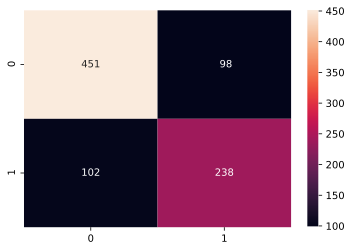

In [679]:
show_cross_validation_score(y.ravel(), tree_clf_cv_pred)

In [680]:
# Feature importances
sorted(zip(tree_class.feature_importances_, cleaned_columns), reverse=True)

[(0.3189685360732467, 'Title-Mr'),
 (0.22799557388189728, 'Fare'),
 (0.18132907238264945, 'Age'),
 (0.08662293180721073, 'FamSize'),
 (0.0820491358447903, 'Class-3'),
 (0.02440077670649055, 'Title-Rev'),
 (0.018334482155528836, 'Title-Miss'),
 (0.010193898571296664, 'Embarked-S'),
 (0.009972863198106937, 'Class-2'),
 (0.008638337446881857, 'Title-Dr'),
 (0.006749825244782451, 'Embarked-Q'),
 (0.005081759473089571, 'Embarked-C'),
 (0.004388298268372083, 'Title-Capt'),
 (0.0041364330375728885, 'Title-Major'),
 (0.0036514739640468464, 'Class-1'),
 (0.0033273786417941675, 'Title-Master'),
 (0.002495533981345626, 'Sex'),
 (0.0016636893208970835, 'Title-Mrs'),
 (0.0, 'Title-Sir'),
 (0.0, 'Title-Lady'),
 (0.0, 'Title-Col')]

In [681]:
def plot_precision_recall_vs_threshold_curve(precisions, recalls, thresholds):
    fig, [ax1, ax2] = plt.subplots(2, 1, sharex="col", sharey="row", figsize=(8,10))
    ax2.plot(thresholds, precisions[:-1], 'b--', label='precision')
    ax2.plot(thresholds, recalls[:-1], 'g-', label='recall')
    ax2.set_xlabel('Threshold')
    ax2.set_title("Precision and recall versus the decision threshold")
    ax2.legend(loc='best')
    ax2.grid()
    
    
    ax1.plot(precisions, recalls)
    ax1.set_title("Precision versus recall")
    ax1.set_ylabel('Precision')
    ax1.set_xlabel('Recall')
    ax1.grid()

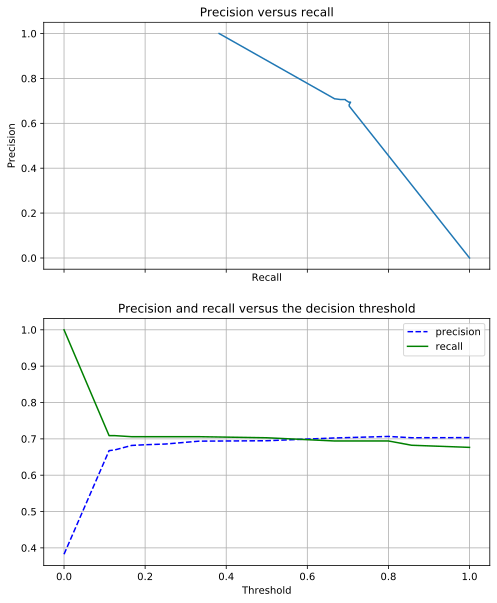

In [682]:
precisions, recalls, thresholds = precision_recall_curve(y.ravel(), tree_clf_predict_proba[:,1])
plot_precision_recall_vs_threshold_curve(precisions, recalls, thresholds)

In [735]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_features=19, max_depth=7, n_estimators=400)
rfc.fit(X, y.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=19,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [736]:
print('score(accuracy) on training set', rfc.score(X,y))

score(accuracy) on training set 0.9032620922384702


scores

precision 0.9177631578947368
recall    0.8205882352941176
f1        0.8664596273291925
accuracy  0.9032620922384702


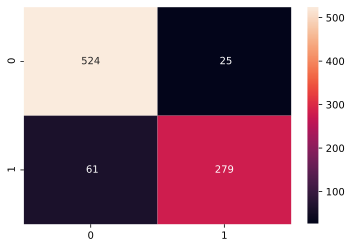

In [737]:
y_pred = rfc.predict(X)
show_cross_validation_score(y.ravel(), y_pred)

In [738]:
# Feature importances
sorted(zip(rfc.feature_importances_, cleaned_columns), reverse=True)

[(0.27391815320074786, 'Title-Mr'),
 (0.17020425958462662, 'Fare'),
 (0.16777771840214112, 'Sex'),
 (0.1362912756769937, 'Age'),
 (0.08505288042434703, 'Class-3'),
 (0.08182182890729925, 'FamSize'),
 (0.02177868870496975, 'Class-1'),
 (0.013649197903075725, 'Title-Rev'),
 (0.009872436239028852, 'Title-Master'),
 (0.009587323418052896, 'Embarked-S'),
 (0.0059493085777167845, 'Embarked-C'),
 (0.005659846154142579, 'Class-2'),
 (0.004164089232016545, 'Title-Dr'),
 (0.004151584111718817, 'Embarked-Q'),
 (0.003377752347213517, 'Title-Miss'),
 (0.003052760766432893, 'Title-Mrs'),
 (0.0017048670829786022, 'Title-Major'),
 (0.000994054067548773, 'Title-Capt'),
 (0.0007506026936944466, 'Title-Col'),
 (0.0002413725052543457, 'Title-Sir'),
 (0.0, 'Title-Lady')]

scores

precision 0.8322368421052632
recall    0.7441176470588236
f1        0.7857142857142857
accuracy  0.8447694038245219


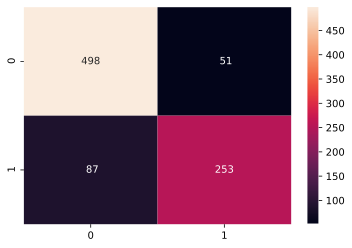

In [739]:
from sklearn.model_selection import cross_val_predict

rfc_predict_proba = cross_val_predict(rfc, X, y.ravel(), cv=5, method='predict_proba')
rfc_cv_pred = cross_val_predict(rfc, X, y.ravel(), cv=5)

# pd.DataFrame(rfc_predict_proba).hist(bins=50, figsize=LARGE_FIG_SIZE)
show_cross_validation_score(y.ravel(), rfc_cv_pred)

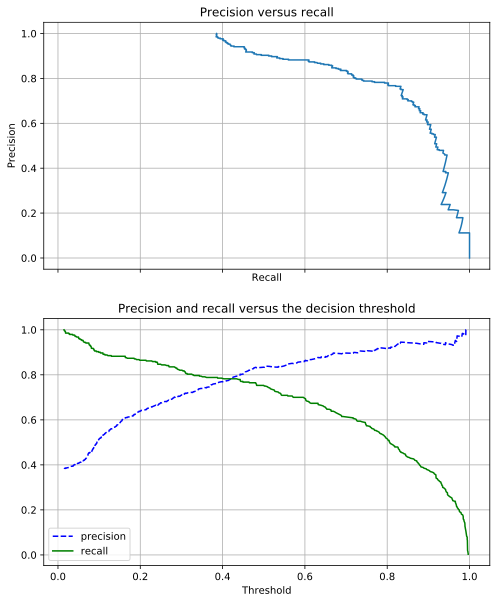

In [740]:
precisions, recalls, thresholds = precision_recall_curve(y.ravel(), rfc_predict_proba[:,1])
plot_precision_recall_vs_threshold_curve(precisions, recalls, thresholds)

In [741]:
from sklearn.model_selection import StratifiedShuffleSplit


def plot_learning_curves(model, X, y, error):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    train_index, test_index = list(split.split(X, y))[0]
    X_train, X_val, y_train, y_val = X[train_index], X[test_index], y[train_index], y[test_index]
    train_errors, val_errors = [], []
    for m in range(1, len(X_train), 10):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(error(y_train[:m], y_train_predict))
        val_errors.append(error(y_val, y_val_predict))
        
    plt.plot(range(1, len(X_train), 10), train_errors, "r-+", linewidth=2, label="train")
    plt.plot(range(1, len(X_train), 10), val_errors, "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.title('Learning Curves')
    plt.grid()

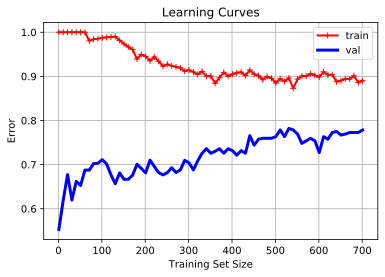

In [742]:
plot_learning_curves(rfc, X, y.ravel(), f1_score)

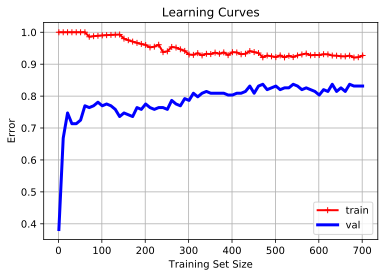

In [743]:
from sklearn.metrics import accuracy_score

plot_learning_curves(rfc, X, y.ravel(), accuracy_score)

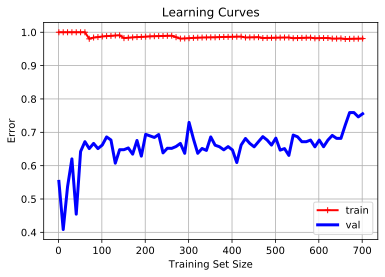

In [692]:
plot_learning_curves(tree_class, X, y.ravel(), f1_score)

In [183]:
#False Positives

fp = (y.ravel() == 0) & (y_pred == 1)
fn = (y.ravel() == 1) & (y_pred == 0)

In [703]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [300, 400, 500], 'max_features': [16, 17, 18, 19, 20], 'criterion': ['gini'], 'max_depth': [6,7,8,9,10]},
]

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search.fit(X, y.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [704]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 19, 'n_estimators': 400}

In [442]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [705]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8346600647495714 {'criterion': 'gini', 'max_depth': 6, 'max_features': 16, 'n_estimators': 300}
0.8301529867326858 {'criterion': 'gini', 'max_depth': 6, 'max_features': 16, 'n_estimators': 400}
0.8335301212467465 {'criterion': 'gini', 'max_depth': 6, 'max_features': 16, 'n_estimators': 500}
0.8335301212467467 {'criterion': 'gini', 'max_depth': 6, 'max_features': 17, 'n_estimators': 300}
0.8324128737383354 {'criterion': 'gini', 'max_depth': 6, 'max_features': 17, 'n_estimators': 400}
0.8312829302355107 {'criterion': 'gini', 'max_depth': 6, 'max_features': 17, 'n_estimators': 500}
0.8324128737383354 {'criterion': 'gini', 'max_depth': 6, 'max_features': 18, 'n_estimators': 300}
0.8357836602551896 {'criterion': 'gini', 'max_depth': 6, 'max_features': 18, 'n_estimators': 400}
0.8312829302355107 {'criterion': 'gini', 'max_depth': 6, 'max_features': 18, 'n_estimators': 500}
0.8357900082523964 {'criterion': 'gini', 'max_depth': 6, 'max_features': 19, 'n_estimators': 300}
0.8290357392242746 {

In [745]:
titanic_test = pd.read_csv('test.csv')
X_test = pipeline.transform(add_title_transformer(titanic_test))
y_test = rfc.predict(X_test)
result_df = pd.DataFrame(y_test, index=titanic_test['PassengerId'], columns=['Survived'])
result_df.to_csv('result8.csv')

In [369]:
def nan_info(df, hide_no_nans=True):
    nans_count = df.isnull().sum()
    nans_percent = 100*nans_count/df.shape[0]
    nan_df = pd.DataFrame({'count': nans_count, 'percent': nans_percent}).sort_values('percent', axis=0, ascending=False)
    if hide_no_nans:
        return nan_df[nan_df['count']!=0]
    return nan_df

nan_info(titanic_test)

,count,percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


In [163]:
np.sum(y_test)

154

To read: https://www.ahmedbesbes.com/blog/kaggle-titanic-competition